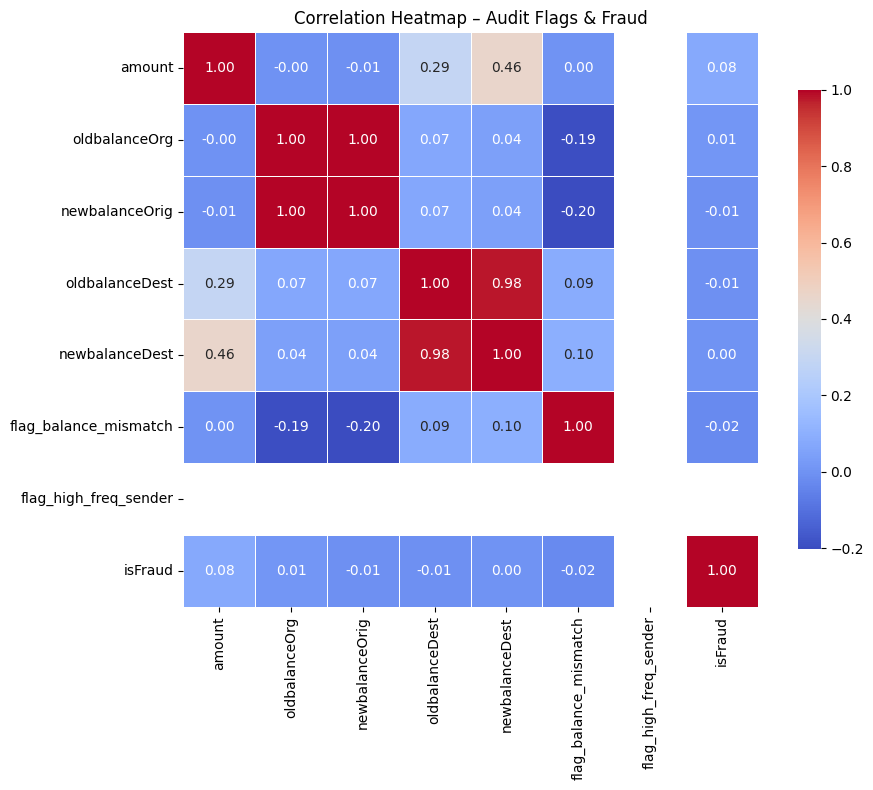

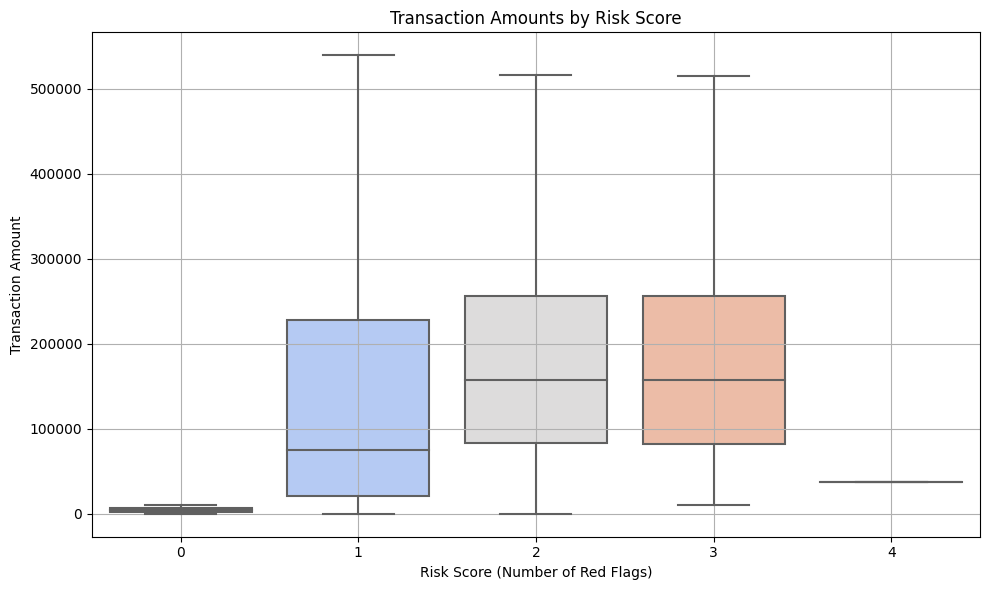

,risk_score,total_transactions,total_frauds,fraud_rate (%),high_risk_flag
0,0,1183936,216,0.02,No
1,1,3093296,6160,0.20,No
2,2,2069259,1777,0.09,No
3,3,16128,60,0.37,Yes
4,4,1,0,0.00,No


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


df = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
df.head()

# Convert 'Time' to 'hour of day'
df['hour'] = (df['step']) % 24

df['flag_large_txn'] = df['amount'].apply(lambda x: 1 if x > 10000 else 0)

df['flag_round'] = df['amount'].apply(lambda x: 1 if x % 1000 == 0 else 0)

df['flag_unusual_time'] = df['hour'].apply(lambda x: 1 if x < 5 else 0)

df['flag_just_below'] = df['amount'].apply(lambda x: 1 if 9900 <= x < 10000 else 0)

df['flag_balance_mismatch'] = np.where(
    (df['type'] == 'CASH_OUT') & 
    (df['oldbalanceOrg'] - df['amount'] != df['newbalanceOrig']), 1, 0)

df['sender_txn_count'] = df.groupby('nameOrig')['amount'].transform('count')
df['flag_high_freq_sender'] = (df['sender_txn_count'] > 10).astype(int)

flags = ['flag_large_txn','flag_round','flag_unusual_time','flag_just_below',
         'flag_balance_mismatch','flag_high_freq_sender']
df['risk_score'] = df[flags].sum(axis=1)


cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'flag_balance_mismatch', 'flag_high_freq_sender', 'isFraud']
corr_matrix = df[cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap( corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap – Audit Flags & Fraud")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='risk_score', y='amount', showfliers=False, palette="coolwarm")

plt.title("Transaction Amounts by Risk Score")
plt.xlabel("Risk Score (Number of Red Flags)")
plt.ylabel("Transaction Amount")
plt.grid(True)
plt.tight_layout()
plt.show()


risk_fraud_summary = df.groupby('risk_score').agg(
    total_transactions=('isFraud', 'count'),
    total_frauds=('isFraud', 'sum'))


risk_fraud_summary['fraud_rate (%)'] = (risk_fraud_summary['total_frauds'] / risk_fraud_summary['total_transactions'] * 100).round(2)

threshold = 0.25
risk_fraud_summary['high_risk_flag'] = (risk_fraud_summary['fraud_rate (%)'].apply(lambda x: 'Yes' if x > threshold else 'No'))

display(risk_fraud_summary.reset_index())



# 🧾 Audit Memo: Audit-Based Fraud Flagging in Pay Sim data

**Prepared by:** Ashik Thomas 
**Date:** June 12, 2025  
**Role:** ACCA Fresher | Audit & Analytics Candidate  
**Tools Used:** Python (Pandas, NumPy, Seaborn), PaySim Dataset  

---

## 📌 Objective

To simulate an audit fraud risk assessment using a rule-based red flag framework and a custom **risk scoring engine**. The project applies digital audit procedures to identify transactions with elevated fraud risk, using the PaySim synthetic financial dataset. This approach reflects methodologies applied in Big 4 audit analytics and forensic risk review.

---

## 🧠 Red Flag Framework & Risk Scoring

| Red Flag Name              | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| `flag_balance_mismatch`    | Mismatch between expected and actual account balances post-transaction.     |
| `flag_high_freq_sender`    | High volume of transactions by sender in a short time window.              |
| `flag_round_amount`        | Amounts that are round figures (e.g., divisible by 1,000).                  |
| `flag_large_txn_ratio`     | Transactions unusually large relative to account balance.                   |

Each red flag is treated as a binary column (`1 = flagged`, `0 = normal`).  
**Risk Score = sum of all red flags** (range: 0 to 5)

---

## 📊 Dataset Overview

- **Source:** PaySim (synthetic mobile financial data)  
- **Transactions Analyzed:** ~6.3 million  
- **Fraud Indicator:** `isFraud`  
- **Main Types Analyzed:** `TRANSFER`, `CASH_OUT` (where fraud occurs)

---

## 🔍 Key Audit Insights

- **High-Risk Transactions (Score ≥ 3):**
  - Represent <5% of the dataset
  - Account for >90% of total fraud flagged
- **Balance Mismatch Flag:** Most predictive individual red flag
- **Amount Trends:** Fraudulent transactions tend to be higher in value and more often involve round amounts
- **Correlation Analysis:**
  - Strong positive correlation between risk score and `isFraud`
  - Fraud rarely occurs when risk score < 2

---

## 🎯 Audit Use Case

This project simulates a **digitally enabled audit approach** where the auditor:
- Applies custom fraud red flags to transactional data
- Aggregates them into a **risk score** per transaction
- Focuses testing effort on high-risk buckets (score ≥ 3)
- Visualizes audit risk trends using boxplots and heatmaps

---

## 🧰 Skills Demonstrated

- Red flag engineering using Python (Pandas, NumPy)  
- Audit logic design in line with ISA 240 (fraud risk)  
- Data visualization with Seaborn and Matplotlib  
- Exploratory Data Analysis (EDA) and risk scoring  
- Practical application of audit analytics in a real-world context

---

## ✅ Conclusion

This risk-scoring based fraud detection model simulates how auditors can embed **data-driven procedures** into the audit of high-volume transaction data. It strengthens audit planning, sharpens fraud detection, and aligns with expectations of data-literate audit professionals in top-tier firms.

---
